# Sound detection

### Capture a sound

In the cell below, record a chainsaw, by, for example, playing [this](https://youtu.be/2CoS5MrRGO4?t=22) video on your phone.

In [83]:
import sounddevice as sd

fs = 22050
duration = 4

recording = sd.rec(duration * fs, samplerate=fs, channels=1, dtype='float64').ravel()
sd.wait()
print("Capture Complete")

Capture Complete


### Audio analysis

#### Recorded sound (chainsaw)

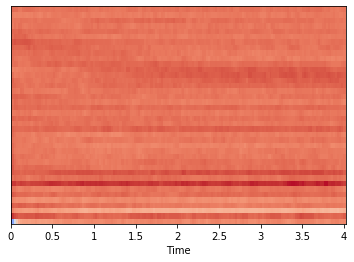

In [109]:
import librosa
import librosa.display
import IPython.display as ipd

chainsaw = {'data': recording, 'rate': fs}

chainsaw_mfccs = librosa.feature.mfcc(y=chainsaw['data'], sr=chainsaw['rate'], n_mfcc=40)
librosa.display.specshow(chainsaw_mfccs, sr=chainsaw['rate'], x_axis='time')

ipd.Audio(chainsaw['data'], rate=chainsaw['rate'])

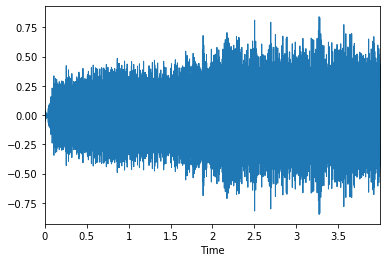

In [85]:
_ = librosa.display.waveplot(chainsaw['data'],sr=chainsaw['rate'])

#### Sounds from WAV file (drill)

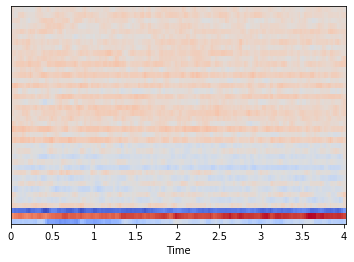

In [71]:
filename = '../UrbanSound8K/audio/fold3/103199-4-0-3.wav'
data,rate = librosa.load(filename)

drill = {'data': data, 'rate': rate}

drill_mfccs = librosa.feature.mfcc(y=drill['data'], sr=drill['rate'], n_mfcc=40)
librosa.display.specshow(drill_mfccs, sr=drill['rate'], x_axis='time')

ipd.Audio(filename)

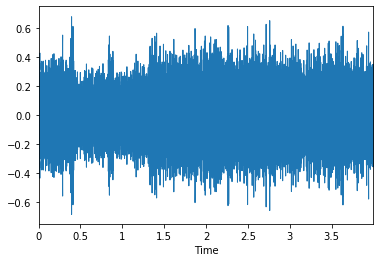

In [72]:
_ = librosa.display.waveplot(drill['data'],sr=drill['rate'])

#### Sounds from WAV file (dog bark)

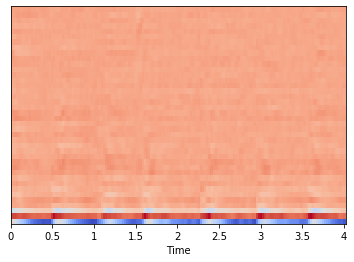

In [73]:
filename = '../UrbanSound8K/audio/fold2/100652-3-0-1.wav'
data,rate = librosa.load(filename)

dog = {'data':data, 'rate':rate}

dog_mfccs = librosa.feature.mfcc(y=dog['data'], sr=dog['rate'], n_mfcc=40)
librosa.display.specshow(dog_mfccs, sr=dog['rate'], x_axis='time')

ipd.Audio(filename)

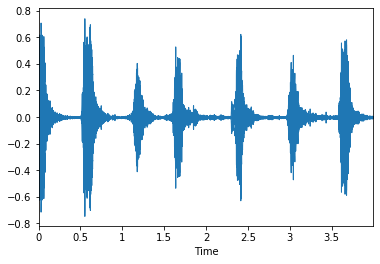

In [74]:
_ = librosa.display.waveplot(dog['data'],sr=dog['rate'])

#### Sounds from WAV file (music)

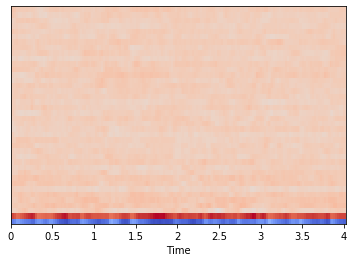

In [75]:
filename = '../UrbanSound8K/audio/fold7/101848-9-0-0.wav'
data,rate = librosa.load(filename)

music = {'data':data, 'rate':rate}

music_mfccs = librosa.feature.mfcc(y=music['data'], sr=music['rate'], n_mfcc=40)
librosa.display.specshow(music_mfccs, sr=music['rate'], x_axis='time')

ipd.Audio(filename)

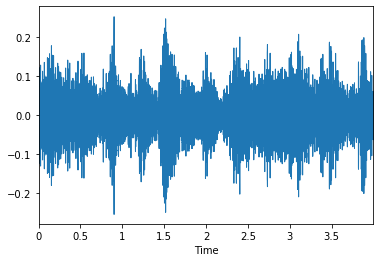

In [76]:
_ = librosa.display.waveplot(music['data'],sr=music['rate'])

### Classification

In [112]:
import sounddevice as sd
import librosa
import numpy as np
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder

model = load_model('../train/saved_models/weights.best.basic_cnn.hdf5')
le = LabelEncoder()
le.classes_ = np.load('../train/saved_models/classes.npy')

num_rows = 40
num_columns = 174
num_channels = 1
max_pad_len = 174

sample = chainsaw

mfccs = librosa.feature.mfcc(y=sample['data'], sr=sample['rate'], n_mfcc=40)
pad_width = max_pad_len - mfccs.shape[1]
mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')

prediction_feature = mfccs
prediction_feature = prediction_feature.reshape(
        1, num_rows, num_columns, num_channels)

predicted_vector = model.predict_classes(prediction_feature)
predicted_class = le.inverse_transform(predicted_vector)
print("The predicted class is:", predicted_class[0], '\n')

predicted_proba_vector = model.predict_proba(prediction_feature)
predicted_proba = predicted_proba_vector[0]
for i in range(len(predicted_proba)):
    category = le.inverse_transform(np.array([i]))
    print(category[0], "\t\t : ", format(predicted_proba[i], '.32f'))


The predicted class is: drilling 

air_conditioner 		 :  0.00000000360376373187420995236607
car_horn 		 :  0.00000030217876201277249492704868
children_playing 		 :  0.00004454649024410173296928405762
dog_bark 		 :  0.00106468424201011657714843750000
drilling 		 :  0.99686831235885620117187500000000
engine_idling 		 :  0.00000007902351484290193184278905
gun_shot 		 :  0.00000000022749460648618935465493
jackhammer 		 :  0.00000000041413830698111553374474
siren 		 :  0.00032676386763341724872589111328
street_music 		 :  0.00169533060397952795028686523438
